#Importing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
df = pd.read_csv("climate connect electricity.csv")
#dropping the unnamed column
df1 = df.drop(columns =["Unnamed: 0"])
df1.tail(5)

,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date
103579,12/14/2020 22:45,NaN,12.450375,12.450375,0.611625,4.087125,1.9110,0.0000,12/14/2020
103580,12/14/2020 23:00,NaN,12.285000,12.285000,0.619500,4.084500,1.8795,0.0000,12/14/2020
103581,12/14/2020 23:15,NaN,13.650000,13.650000,0.829500,8.589000,2.4675,0.8925,12/14/2020
103582,12/14/2020 23:30,NaN,13.650000,13.650000,0.829500,8.610000,2.4150,0.8925,12/14/2020
103583,12/14/2020 23:45,NaN,13.387500,13.387500,0.840000,8.662500,2.4150,0.8610,12/14/2020


In [3]:
#checking the information and shape of the dataset
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103584 entries, 0 to 103583
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            103584 non-null  int64  
 1   datetime              103584 non-null  object 
 2   load                  101952 non-null  float64
 3   apparent_temperature  103584 non-null  float64
 4   temperature           103584 non-null  float64
 5   humidity              103584 non-null  float64
 6   dew_point             103584 non-null  float64
 7   wind_speed            103584 non-null  float64
 8   cloud_cover           103584 non-null  float64
 9   date                  103584 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 7.9+ MB
None
(103584, 10)


In [4]:
#Checking the total no of null values
df1['load'].isnull().sum()

1632

#Describing the dataset

In [5]:
#descriptive statistic of dataset with some load values are null
df1.describe()

,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover
count,101952.000000,103584.000000,103584.000000,103584.000000,103584.000000,103584.000000,103584.000000
mean,1558.964330,29.084052,27.080153,0.602338,15.890729,2.431892,0.329437
std,531.116557,10.411410,8.496460,0.235395,7.938254,1.365737,0.334519
min,480.631730,2.173500,3.685500,0.042000,-13.692000,0.000000,0.000000
25%,1184.992600,20.590500,20.559000,0.420000,9.783375,1.477875,0.000000
50%,1496.820000,29.922375,28.621688,0.609000,14.899500,2.352000,0.215250
75%,1935.745800,37.458750,33.348000,0.798000,23.887500,3.286500,0.582750
max,3230.848600,56.731500,47.943000,1.050000,31.059000,10.321500,1.050000


#Distribtion of dataset

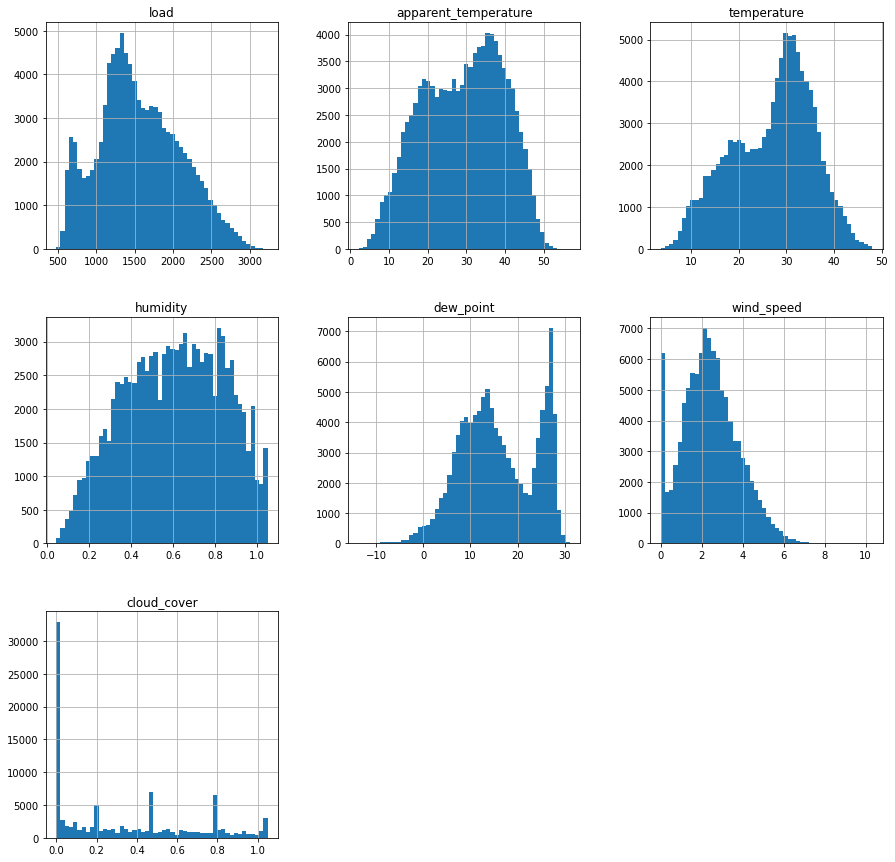

In [6]:
#histogram for all numericals
df1.hist(bins = 50, figsize = (15,15))

plt.show()

#Correlation matrix for dataset

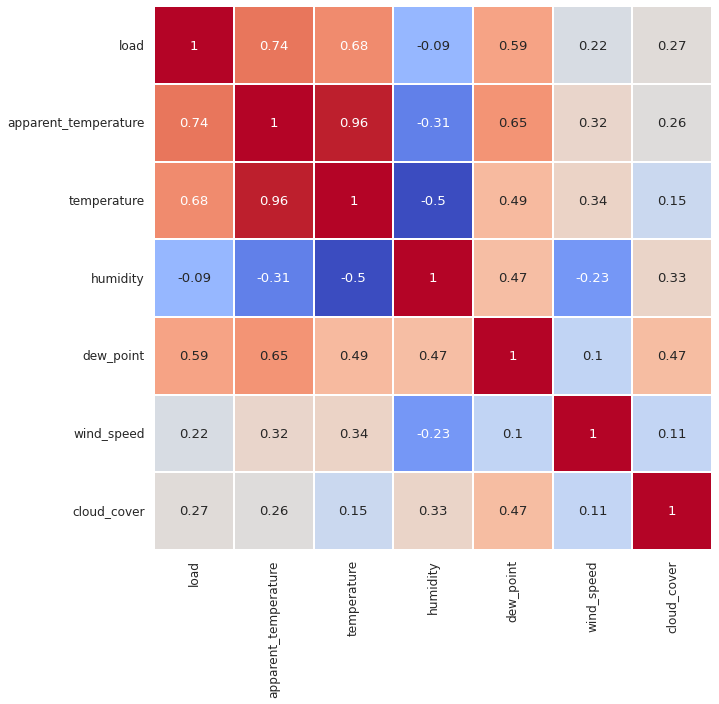

In [7]:
#finding correlation
sns.set(font_scale=1.1)
correlation = df1.corr()
#Ploting the correlation values using the seaborn heat map
plt.figure(figsize=(10, 10))
sns.heatmap(correlation,
            annot=True,
            cmap='coolwarm',
            linewidths=1,
            cbar=False)

plt.show()

In [8]:
#coorelation for target variable vs the other numericals
correlation["load"]

load                    1.000000
apparent_temperature    0.744866
temperature             0.675415
humidity               -0.089618
dew_point               0.585815
wind_speed              0.216450
cloud_cover             0.268026
Name: load, dtype: float64

correlation between target variable vs features variables. All features have good correlation except the humidity which has negative correlation

#Converting object to datetime type

In [9]:
#converting the date object into pandas date time and fetching the year, month, day and time from the date features and appending the new column for the same.

df1["date"] = pd.to_datetime(df1["date"])
df1["datetime"] = pd.to_datetime(df1["datetime"])
df1["year"] = df1["date"].dt.year
df1["year"]  
df1["month"] = df1["date"].dt.month
df1["month"] 
df1["weekday"] = df1["date"].dt.weekday
df1["weekday"] 
df1["time"] = df1["datetime"].dt.time
df1["time"]
# displaying the existing features and also newly appended features
df1.head()

,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date,year,month,weekday,time
0,2018-01-01 00:00:00,803.22270,10.45800,10.45800,0.955500,8.946000,0.0,0.0,2018-01-01,2018,1,0,00:00:00
1,2018-01-01 00:15:00,774.89523,10.32675,10.32675,0.961625,8.911875,0.0,0.0,2018-01-01,2018,1,0,00:15:00
2,2018-01-01 00:30:00,731.46927,10.19550,10.19550,0.967750,8.877750,0.0,0.0,2018-01-01,2018,1,0,00:30:00
3,2018-01-01 00:45:00,713.93870,10.06425,10.06425,0.973875,8.843625,0.0,0.0,2018-01-01,2018,1,0,00:45:00
4,2018-01-01 01:00:00,699.23007,9.93300,9.93300,0.980000,8.809500,0.0,0.0,2018-01-01,2018,1,0,01:00:00


In [10]:
#checking the information of newly appended columns.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103584 entries, 0 to 103583
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   datetime              103584 non-null  datetime64[ns]
 1   load                  101952 non-null  float64       
 2   apparent_temperature  103584 non-null  float64       
 3   temperature           103584 non-null  float64       
 4   humidity              103584 non-null  float64       
 5   dew_point             103584 non-null  float64       
 6   wind_speed            103584 non-null  float64       
 7   cloud_cover           103584 non-null  float64       
 8   date                  103584 non-null  datetime64[ns]
 9   year                  103584 non-null  int64         
 10  month                 103584 non-null  int64         
 11  weekday               103584 non-null  int64         
 12  time                  103584 non-null  object        
dtyp

In [11]:

df2= df1[df1["load"].isnull()]

print(df2.shape)


(1632, 13)


In [12]:
#dropping the null values in the dataset.
df3 = df1.dropna(axis=0)
df3

,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date,year,month,weekday,time
0,2018-01-01 00:00:00,803.22270,10.45800,10.45800,0.955500,8.946000,0.000000,0.00000,2018-01-01,2018,1,0,00:00:00
1,2018-01-01 00:15:00,774.89523,10.32675,10.32675,0.961625,8.911875,0.000000,0.00000,2018-01-01,2018,1,0,00:15:00
2,2018-01-01 00:30:00,731.46927,10.19550,10.19550,0.967750,8.877750,0.000000,0.00000,2018-01-01,2018,1,0,00:30:00
3,2018-01-01 00:45:00,713.93870,10.06425,10.06425,0.973875,8.843625,0.000000,0.00000,2018-01-01,2018,1,0,00:45:00
4,2018-01-01 01:00:00,699.23007,9.93300,9.93300,0.980000,8.809500,0.000000,0.00000,2018-01-01,2018,1,0,01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103387,2020-12-12 22:45:00,858.50000,17.79750,17.79750,0.756000,12.400500,1.950375,0.16275,2020-12-12,2020,12,5,22:45:00
103388,2020-12-12 23:00:00,832.24000,17.66100,17.66100,0.756000,12.264000,2.047500,0.14700,2020-12-12,2020,12,5,23:00:00
103389,2020-12-12 23:15:00,804.97000,17.46675,17.46675,0.758625,12.127500,2.144625,0.11550,2020-12-12,2020,12,5,23:15:00
103390,2020-12-12 23:30:00,763.56000,17.27250,17.27250,0.761250,11.991000,2.241750,0.08400,2020-12-12,2020,12,5,23:30:00


In [13]:
#descriptive statics after removing  the load NaN values
df3.describe()


,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,year,month,weekday
count,101952.000000,101952.000000,101952.000000,101952.000000,101952.000000,101952.000000,101952.000000,101952.000000,101952.000000,101952.000000
mean,1558.964330,29.122016,27.102805,0.602544,15.911664,2.432347,0.328594,2018.978343,6.418079,3.000000
std,531.116557,10.427043,8.500928,0.235647,7.926193,1.368330,0.333647,0.815636,3.406609,1.997654
min,480.631730,2.583000,3.685500,0.042000,-13.692000,0.000000,0.000000,2018.000000,1.000000,0.000000
25%,1184.992600,20.559000,20.538000,0.420000,9.791250,1.475250,0.000000,2018.000000,3.000000,1.000000
50%,1496.820000,29.956500,28.641375,0.611625,14.898187,2.352000,0.215250,2019.000000,6.000000,3.000000
75%,1935.745800,37.548000,33.379500,0.798000,23.916375,3.286500,0.580125,2020.000000,9.000000,5.000000
max,3230.848600,56.731500,47.943000,1.050000,31.059000,10.321500,1.050000,2020.000000,12.000000,6.000000


In [14]:
df3["wind_speed"] = (np.sqrt(df3["wind_speed"]))



In [15]:
#mapping the categoricals with respective month and days for identifying easily.
new_month = {1:"January",2:"Feburary",3:"March",4:'April',5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
new_weekday = {0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
df3["month"] = df3['month'].map(new_month)
df3["weekday"] = df3['weekday'].map(new_weekday)

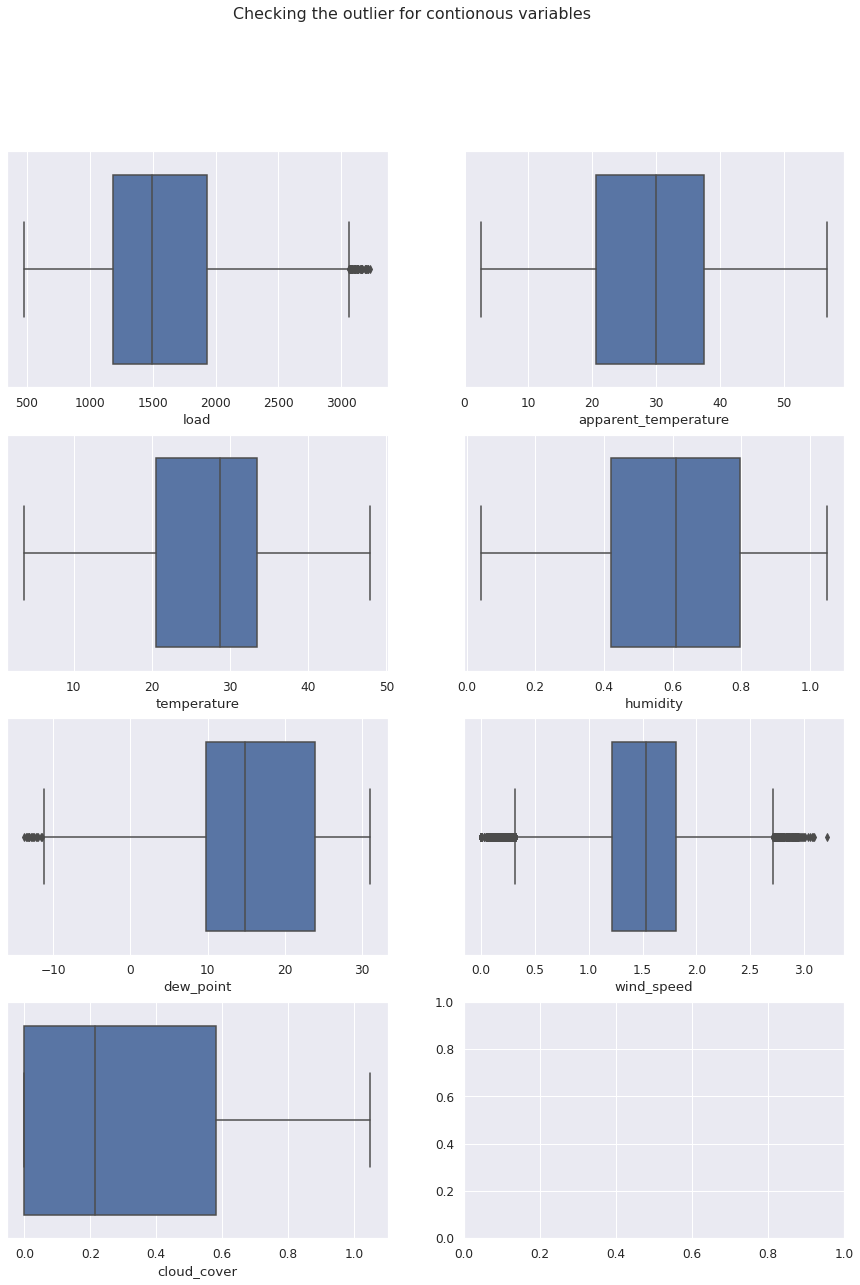

In [16]:
#Plotting the boxplot to check the outliers in the numerical features
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(15,20))
fig .suptitle("Checking the outlier for contionous variables")
sns.boxplot(x=df3['load'],ax=ax[0,0])
sns.boxplot(x=df3['apparent_temperature'],ax=ax[0,1])
sns.boxplot(x=df3['temperature'],ax=ax[1,0])
sns.boxplot(x=df3['humidity'],ax=ax[1,1])
sns.boxplot(x=df3['dew_point'],ax=ax[2,0])
sns.boxplot(x=df3['wind_speed'],ax=ax[2,1])
sns.boxplot(x=df3['cloud_cover'],ax=ax[3,0])
plt.show()


In [17]:
#replacing the outliers using IQR method
q1 = df['load'].quantile(0.25)
q3 = df['load'].quantile(0.75)
print(q1,q3)

1184.9926 1935.7458


In [18]:
qw1 = df3['wind_speed'].quantile(0.25)	
qw3 = df3["wind_speed"].quantile(0.75)
print(qw1,qw3)

1.2145986991595208 1.8128706517564899


In [19]:
q1d = df3['dew_point'].quantile(0.25)
q3d = df3['dew_point'].quantile(0.75)
print(q1d,q3d)

9.79125 23.916375


for outliers all the lower bound values are replaced with lower values and upper bound values are replaced with upper values

In [20]:
##Load 
q1 = 1184.992600	
q3 = 1934.2485
IQR = q3-q1
lower = q1 - (1.5*(IQR))
upper = q3 + (1.5*(IQR))
lower1 = df3["load"].median()
df3["load"] = np.where(df3["load"]>upper,lower1,np.where(df3["load"]<lower,lower1,df3["load"]))


In [21]:
##windspeed
qw1 = df3['wind_speed'].quantile(0.25)	
qw3 = df3["wind_speed"].quantile(0.75)
IQRw = qw3 - qw1
lowerw = qw1 - (1.5*(IQRw))
upperw = qw3 + (1.5*(IQRw))
medwind = df3["wind_speed"].median()
df3["wind_speed"] = np.where(df3["wind_speed"]>upperw,upperw,df3["wind_speed"])
df3["wind_speed"] = np.where(df3["wind_speed"]<lowerw,lowerw,df3["wind_speed"])
print(lowerw,upperw)

0.31719077026406717 2.7102785806519436


In [22]:

##dew point

q1d = 9.79125 
q3d = 23.916375
IQRd = q3d - q1d
lowerd = q1d - (1.5*(IQRd))
upperd = q3d + (1.5*(IQRd))
meddew = df3["dew_point"].median()
df3["dew_point"] = np.where(df3["dew_point"]>upperd,upperd,df3["dew_point"])
df3["dew_point"] = np.where(df3["dew_point"]<lowerd,lowerd,df3["dew_point"])


After removivng the outliers in numericals. box plot and its distribution graphs are plotted

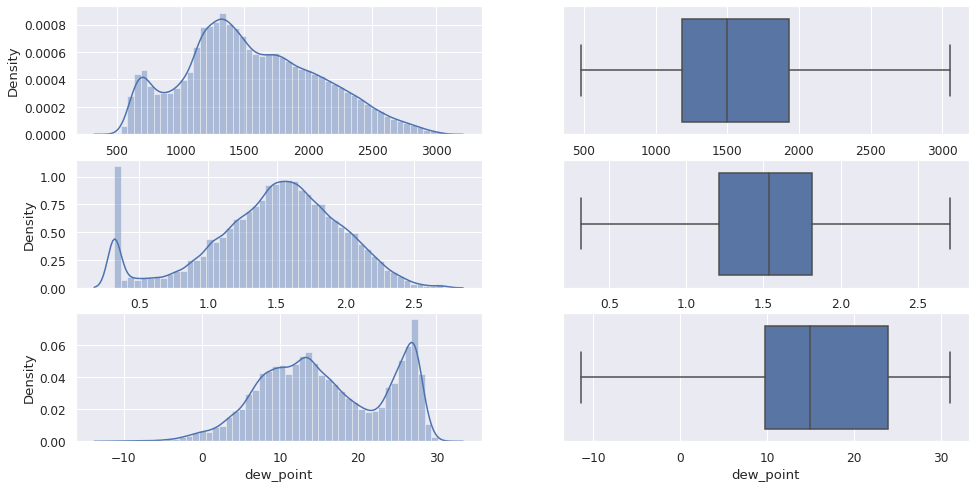

In [23]:
plt.figure(figsize=(16,8))
plt.subplot(3,2,1)
sns.distplot((df3['load']))
plt.subplot(3,2,2)
sns.boxplot(df3['load'])

plt.subplot(3,2,3)
sns.distplot((df3['wind_speed']))
plt.subplot(3,2,4)
sns.boxplot(df3['wind_speed'])

plt.subplot(3,2,5)
sns.distplot((df3['dew_point']))
plt.subplot(3,2,6)
sns.boxplot(df3['dew_point'])

plt.show()

#Visualisation of the target vs other numericals

Text(0.5, 1.0, 'load vs distribition of load for years ')

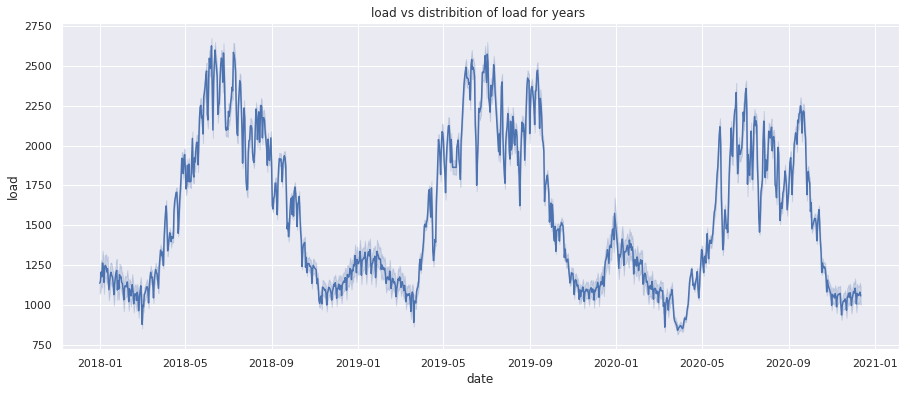

In [24]:
sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(x=df3["date"], y = df3["load"], data=df1)
plt.title("load vs distribition of load for years ")



Text(0.5, 1.0, 'yearly temperature range')

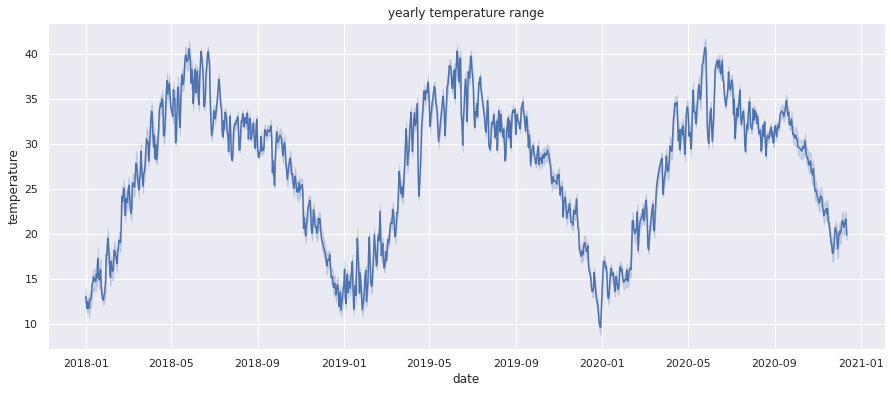

In [25]:
sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(x=df3["date"], y = df3["temperature"], data=df1)
plt.title("yearly temperature range")

from the above two graph we can clearly see the more load is between the period of may month to september month because of summer season. temperature and load of data distribution is quite same for the years. Maximum temperature , high electricity data is required.

Text(0.5, 1.0, 'load vs temperature ')

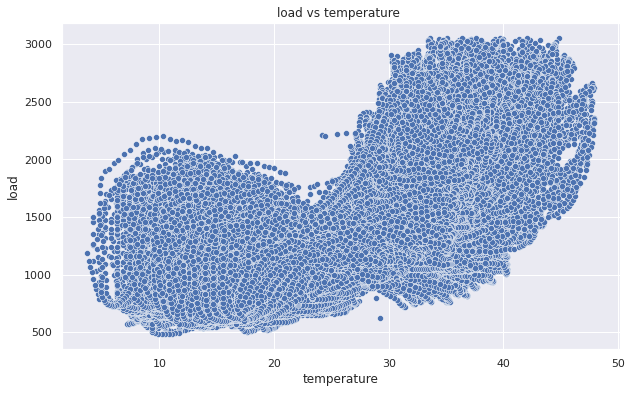

In [26]:
sns.set(rc={'figure.figsize':(10,6)})
sns.scatterplot(x=df3["temperature"], y = df3["load"], data=df3)
plt.title("load vs temperature ")

Temperature also playing a major role, because the temperature increases the load also increases in above graph

Text(0.5, 1.0, 'load vs Apparent temperature ')

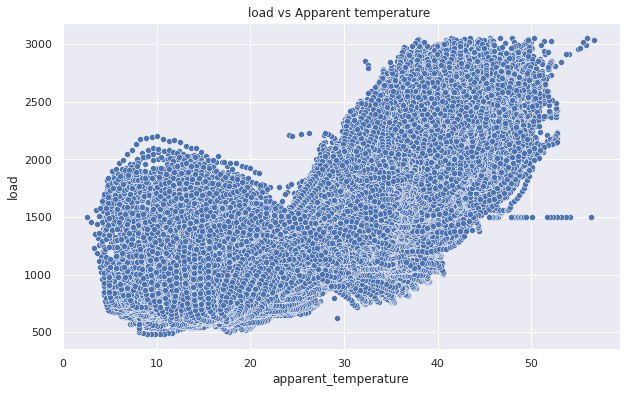

In [27]:
sns.set(rc={'figure.figsize':(10,6)})
sns.scatterplot(x=df3["apparent_temperature"], y = df3["load"], data=df3)
plt.title("load vs Apparent temperature ")

Text(0.5, 1.0, 'load vs humidity ')

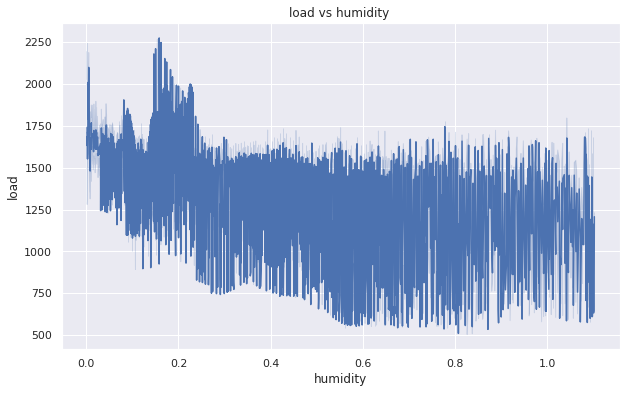

In [28]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(x=(df3["humidity"])**2, y = df3["load"], data=df3)
plt.title("load vs humidity ")

Humidity have negative correlation and we cant see any pattern in this graph

Text(0.5, 1.0, 'load vs humidity ')

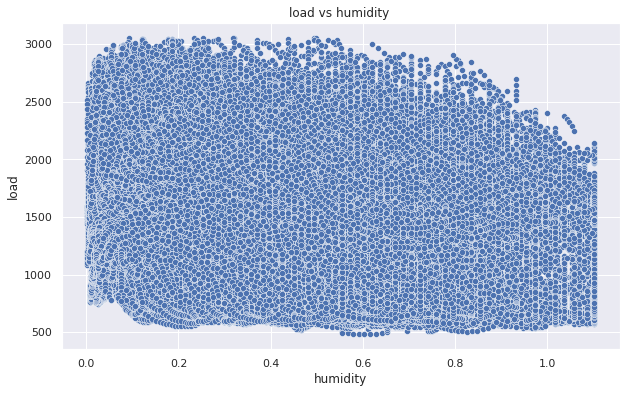

In [29]:
sns.set(rc={'figure.figsize':(10,6)})
sns.scatterplot(x=(df3["humidity"])**2, y = df3["load"], data=df3)
plt.title("load vs humidity ")

Increase in load happen when the humidity is between the o.4 to 0.5 and the correlation for humidity is very less and we didint see any pattern here.

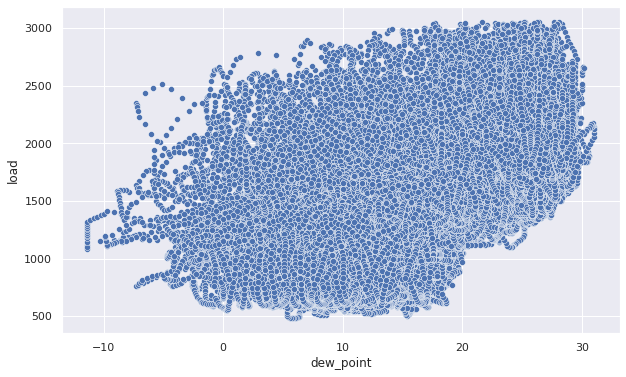

In [30]:
sns.scatterplot(x = (df3["dew_point"]),y = df3["load"],data = df3)

Dew points 0-5 is quite consuming high load and later it decreasing and again the  it slighlty start increasing in dewpoints range 17-25. Here we can see some pattern in graph and this coorelation also quite good.

Text(0.5, 1.0, 'load vs windspeed ')

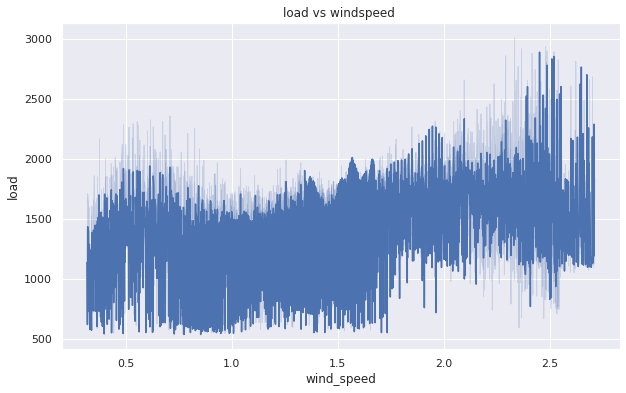

In [31]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(x=df3["wind_speed"], y = df3["load"], data=df3)
plt.title("load vs windspeed ")

load vs windspeed there is a increase load value between 3-6 wind speed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

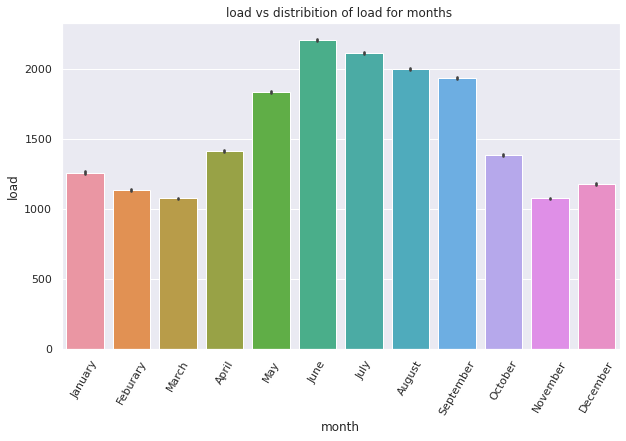

In [32]:
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x=df3["month"], y = df3["load"], data=df3)
plt.title("load vs distribition of load for months ")
plt.xticks(rotation = 60)


load gradually starts increasing in the month of april , peak of load is in june month and then it start decreasing.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

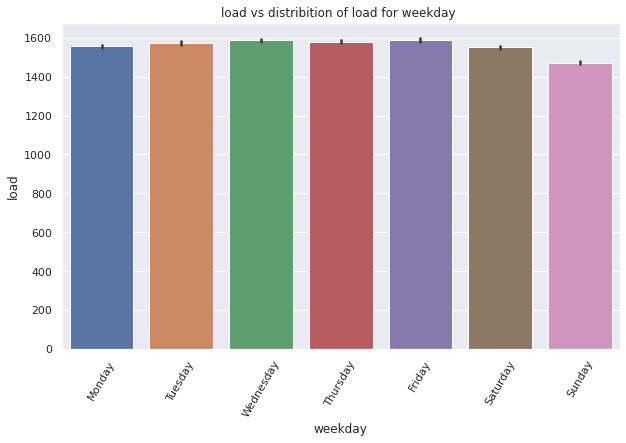

In [33]:
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x=df3["weekday"], y = df3["load"], data=df3)
plt.title("load vs distribition of load for weekday ")
plt.xticks(rotation = 60)

for week days the load is high compared to load in weekend

Text(0.5, 1.0, 'load vs cloud cover ')

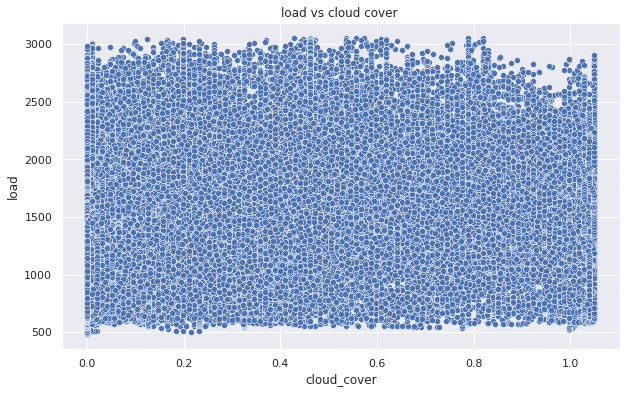

In [34]:
sns.set(rc={'figure.figsize':(10,6)})
sns.scatterplot(x=(df3["cloud_cover"]), y = df3["load"], data=df3)
plt.title("load vs cloud cover ")

Cloud cover is not showing any pattern in the plot

#Label encoding

In [35]:
#using the sklearn label encoder time categoricals is encoded,
# it has 96 values for each day, these values are converted into numericals.
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df1["time"] = label.fit_transform(df1["time"])

In [36]:
df3["time"] = label.fit_transform(df3["time"])

In [37]:
df3

,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date,year,month,weekday,time
0,2018-01-01 00:00:00,803.22270,10.45800,10.45800,0.955500,8.946000,0.317191,0.00000,2018-01-01,2018,January,Monday,0
1,2018-01-01 00:15:00,774.89523,10.32675,10.32675,0.961625,8.911875,0.317191,0.00000,2018-01-01,2018,January,Monday,1
2,2018-01-01 00:30:00,731.46927,10.19550,10.19550,0.967750,8.877750,0.317191,0.00000,2018-01-01,2018,January,Monday,2
3,2018-01-01 00:45:00,713.93870,10.06425,10.06425,0.973875,8.843625,0.317191,0.00000,2018-01-01,2018,January,Monday,3
4,2018-01-01 01:00:00,699.23007,9.93300,9.93300,0.980000,8.809500,0.317191,0.00000,2018-01-01,2018,January,Monday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103387,2020-12-12 22:45:00,858.50000,17.79750,17.79750,0.756000,12.400500,1.396558,0.16275,2020-12-12,2020,December,Saturday,91
103388,2020-12-12 23:00:00,832.24000,17.66100,17.66100,0.756000,12.264000,1.430909,0.14700,2020-12-12,2020,December,Saturday,92
103389,2020-12-12 23:15:00,804.97000,17.46675,17.46675,0.758625,12.127500,1.464454,0.11550,2020-12-12,2020,December,Saturday,93
103390,2020-12-12 23:30:00,763.56000,17.27250,17.27250,0.761250,11.991000,1.497247,0.08400,2020-12-12,2020,December,Saturday,94


Text(0.5, 1.0, 'time vs load ')

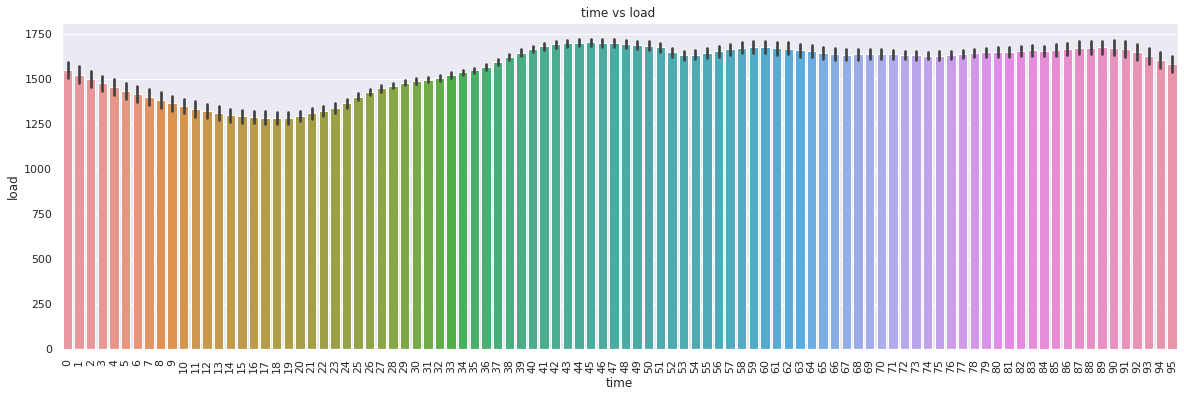

In [38]:
#each bar represents the 15 mins time.Midnight the load capacity is low after the early morning the load capacity steadily icreasing.  
sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(x=df3["time"], y = df3["load"], data=df3)
plt.xticks(rotation = 90)
plt.title("time vs load ")

#One hot encoding

In [39]:
#using pandas get dummies functionality dummies are created to predict the load caapcity.
df3_dummies = pd.get_dummies(data=df3, columns=['weekday', 'month'])
df3_dummies

,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date,year,time,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_April,month_August,month_December,month_Feburary,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,2018-01-01 00:00:00,803.22270,10.45800,10.45800,0.955500,8.946000,0.317191,0.00000,2018-01-01,2018,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2018-01-01 00:15:00,774.89523,10.32675,10.32675,0.961625,8.911875,0.317191,0.00000,2018-01-01,2018,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2018-01-01 00:30:00,731.46927,10.19550,10.19550,0.967750,8.877750,0.317191,0.00000,2018-01-01,2018,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2018-01-01 00:45:00,713.93870,10.06425,10.06425,0.973875,8.843625,0.317191,0.00000,2018-01-01,2018,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2018-01-01 01:00:00,699.23007,9.93300,9.93300,0.980000,8.809500,0.317191,0.00000,2018-01-01,2018,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103387,2020-12-12 22:45:00,858.50000,17.79750,17.79750,0.756000,12.400500,1.396558,0.16275,2020-12-12,2020,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
103388,2020-12-12 23:00:00,832.24000,17.66100,17.66100,0.756000,12.264000,1.430909,0.14700,2020-12-12,2020,92,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
103389,2020-12-12 23:15:00,804.97000,17.46675,17.46675,0.758625,12.127500,1.464454,0.11550,2020-12-12,2020,93,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
103390,2020-12-12 23:30:00,763.56000,17.27250,17.27250,0.761250,11.991000,1.497247,0.08400,2020-12-12,2020,94,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [40]:
df_3 = df3_dummies.drop(['load', 'datetime','date'], axis = 1)
df_3

,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,year,time,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_April,month_August,month_December,month_Feburary,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,10.45800,10.45800,0.955500,8.946000,0.317191,0.00000,2018,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,10.32675,10.32675,0.961625,8.911875,0.317191,0.00000,2018,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,10.19550,10.19550,0.967750,8.877750,0.317191,0.00000,2018,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,10.06425,10.06425,0.973875,8.843625,0.317191,0.00000,2018,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.93300,9.93300,0.980000,8.809500,0.317191,0.00000,2018,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103387,17.79750,17.79750,0.756000,12.400500,1.396558,0.16275,2020,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
103388,17.66100,17.66100,0.756000,12.264000,1.430909,0.14700,2020,92,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
103389,17.46675,17.46675,0.758625,12.127500,1.464454,0.11550,2020,93,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
103390,17.27250,17.27250,0.761250,11.991000,1.497247,0.08400,2020,94,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


#Splitting data

In [41]:
#Splitting the data, though its a time series kind of regression problem , trian test split functionality is not used, 
#instead of splitting, slicing is done .Last three months data


x_test = (df_3.iloc[-9600:,0:]).values
y_test = (df3.iloc[-9600:,1]).values
x_test.shape

(9600, 27)

In [42]:
x_train = (df_3.iloc[:92488,0:]).values
y_train = (df3.iloc[:92488,1]).values
y_train

array([ 803.2227 ,  774.89523,  731.46927, ..., 1564.3183 , 1603.88   ,
       1644.6537 ])

#Scaling data

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train,y_train)



array([[-1.77203324, -1.93081494,  1.44939986, ..., -0.25771018,
        -0.25999283, -0.26093952],
       [-1.78440318, -1.94598278,  1.47542863, ..., -0.25771018,
        -0.25999283, -0.26093952],
       [-1.79677312, -1.96115061,  1.50145739, ..., -0.25771018,
        -0.25999283, -0.26093952],
       ...,
       [ 0.83703437,  0.55033946,  0.55698497, ..., -0.25771018,
        -0.25999283,  3.83230572],
       [ 0.90383205,  0.59614632,  0.51236423, ..., -0.25771018,
        -0.25999283,  3.83230572],
       [ 0.97062972,  0.64195319,  0.46774348, ..., -0.25771018,
        -0.25999283,  3.83230572]])

In [44]:
y_train

array([ 803.2227 ,  774.89523,  731.46927, ..., 1564.3183 , 1603.88   ,
       1644.6537 ])

#Models

##Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
reg = LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_train,y_train)

0.7070153363148086

In [46]:
y_pred = reg.predict(x_test)
y_pred

array([1582.96024542, 1579.0573118 , 1575.1540009 , ..., 1155.70679168,
       1153.07767109, 1150.44267766])

In [47]:
mean_absolute_percentage_error(y_test, y_pred)

0.1563406693389992

In [48]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 204.1425154644693
Mean Squared Error: 67663.36392582711
R2- SCORE: 0.7067751837410965


##XGBOOST regressor

In [49]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
xgboost = xgb.XGBRegressor()
xgboost.fit(x_train, y_train)
y_predxgb = xgboost.predict(x_test)
print(y_predxgb)
print(xgboost.score(x_train, y_train))
rmse = np.sqrt(MSE(y_test,y_predxgb))
print("RMSE : % f" %(rmse))

[08:19:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1760.1075 1720.7196 1676.143  ... 1158.8175 1150.4814 1150.4814]
0.9025229116942268
RMSE :  227.441096


In [50]:
mean_absolute_percentage_error(y_test, y_predxgb)

0.124284855215764

In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predxgb))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predxgb))
print('R2- SCORE:', metrics.r2_score(y_test,y_predxgb))

Mean Absolute Error: 173.1715302394165
Mean Squared Error: 51729.45235652524
R2- SCORE: 0.7758261150148633


##Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error as MSE

regr = RandomForestRegressor(n_estimators=100,max_depth=10)
regr.fit(x_train, y_train)
print(regr.score(x_train, y_train))
y_predrn = regr.predict(x_test)
rmse = np.sqrt(MSE(y_test,y_predrn))
print("RMSE : % f" %(rmse))

0.9559442191447096
RMSE :  234.565758


In [53]:
mean_absolute_percentage_error(y_test, y_predrn)

0.11312341539294861

In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predrn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predrn))
print('R2- SCORE:', metrics.r2_score(y_test,y_predrn))

Mean Absolute Error: 171.12605208533222
Mean Squared Error: 55021.09475119359
R2- SCORE: 0.7615615088769733


##Decision Tree

In [55]:
from sklearn.tree import DecisionTreeRegressor 
dt = DecisionTreeRegressor(random_state = 0) 
dt.fit(x_train, y_train)
dt.score(x_train,y_train)

0.9999999992798594

In [56]:
ypreddt = dt.predict(x_test)

In [57]:
mean_absolute_percentage_error(y_test, ypreddt)

0.13763432891773994

In [58]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypreddt))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypreddt))
print('R2- SCORE:', metrics.r2_score(y_test,ypreddt))

Mean Absolute Error: 201.73390845104166
Mean Squared Error: 75853.6154817215
R2- SCORE: 0.67128204730431


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
for lr in [0.01,0.05,0.1,0.2,0.21,0.22,0.23,0.24,0.25]:
  model= GradientBoostingRegressor(learning_rate=lr)
  model.fit(x_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Test score : ", model.score(x_test,y_test))

Learning rate :  0.01  Train score :  0.6564793609943839  Test score :  0.5735268635855564
Learning rate :  0.05  Train score :  0.8625281993719014  Test score :  0.7524234129990018
Learning rate :  0.1  Train score :  0.9043544445180438  Test score :  0.7924733963695484


In [ ]:
index = ["Linear rgression","decision tree","Random forest","XGboost"]
data = ["Model","Test score","Train score","MAPE"]
final_result = pd.DataFrame(columns = data)
Logistic_regression_metrics = pd.Series({"Model":"Linear regression",
                                         'Train score': reg.score(x_train,y_train),'Test score':reg.score(x_test,y_test),"MAPE":mean_absolute_percentage_error(y_test,y_pred)})
Decision_metrics = pd.Series({"Model":"Decision tree",
                              'Train score': dt.score(x_train,y_train),'Test score': dt.score(x_test,y_test),"MAPE":mean_absolute_percentage_error(y_test,ypreddt)})
Random_metrics = pd.Series({"Model":"Random forest",
                            'Train score': regr.score(x_train,y_train),'Test score': regr.score(x_test,y_test),"MAPE":mean_absolute_percentage_error(y_test,y_predrn)})
XGboost_metrics = pd.Series({"Model":"XGBoost",
                           'Train score': xgboost.score(x_train,y_train),'Test score': xgboost.score(x_test,y_test),"MAPE":mean_absolute_percentage_error(y_test,y_predxgb)})
final_result = final_result.append(Logistic_regression_metrics,ignore_index=True)
final_result = final_result.append(Decision_metrics,ignore_index=True)
final_result = final_result.append(Random_metrics,ignore_index=True)
final_result = final_result.append(XGboost_metrics,ignore_index=True)

final_result

All models are seems to be overifitted except Linear regression .It is used predict the values of load values.

#Task 1

Do a short term forecast for the day 14 December 2020 in the frequency of 15
minutes.

In [ ]:
df_1 = pd.get_dummies(data =df1,columns = ["weekday","month"])

In [ ]:
df_dec = df_1[df_1['date']=="14-12-2020"]
df_dec

In [ ]:
df_t = df_dec.drop(columns = ["datetime","load","date"])
df_t



In [ ]:
x = df_t.values

In [ ]:
y_pred14d = reg.predict(x)

In [ ]:
dec_14 = pd.DataFrame({"Date":df_dec["date"] ,"load":y_pred14d})
dec_14.to_csv("task-1.csv")
dec_14

#Task 2

Task 2 - Do forecast for the rows where load values are NaN.

In [ ]:

df_2 = df_1[df_1["load"].isnull()]

df_ = df_2.drop(columns = ["date","datetime","load"],axis = 0)



x_ = df_.values


In [ ]:
y_pred_df_4 = reg.predict(x_)

In [ ]:
nan_ = pd.DataFrame({"Date":df_2["date"] ,"load":y_pred_df_4})
nan_
nan_.to_csv("task-2.csv")